In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_auc_score

In [63]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.learning_curve import check_cv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [64]:
train=pd.read_csv('train.csv')

In [65]:
test=pd.read_csv('test.csv')

In [66]:
combined = pd.concat([train, test])
combined.reset_index(drop=True, inplace=True)

In [69]:
combined.describe(include='all')

,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,Employer_Code,...,ID,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1
count,69713.000000,98622,98622,99750,86322,99732,31928.000000,94127,93757.000000,94127,...,99750,31928.000000,99750,60170.000000,60170.000000,9.975000e+04,86322,99750,99750,99750.000000
unique,NaN,3,704,2,57,11672,NaN,3,NaN,48281,...,99750,NaN,92,NaN,NaN,NaN,2,33,7,NaN
top,NaN,A,C10001,Y,B001,11/01/82,NaN,A,NaN,COM0000002,...,APPY60329882222,NaN,02/09/16,NaN,NaN,NaN,P,S122,B,NaN
freq,NaN,71383,14313,64772,20155,345,NaN,47805,NaN,622,...,1,NaN,2614,NaN,NaN,NaN,56483,44213,42743,NaN
mean,0.014631,NaN,NaN,NaN,NaN,NaN,1099.485718,NaN,3.722623,NaN,...,NaN,19.233814,NaN,39445.986372,3.894399,5.126893e+03,NaN,NaN,NaN,3.952622
std,0.120073,NaN,NaN,NaN,NaN,NaN,745.125218,NaN,0.803623,NaN,...,NaN,5.857761,NaN,30667.188339,1.162487,1.466628e+05,NaN,NaN,NaN,3.819744
min,0.000000,NaN,NaN,NaN,NaN,NaN,118.000000,NaN,1.000000,NaN,...,NaN,11.990000,NaN,5000.000000,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,642.750000,NaN,4.000000,NaN,...,NaN,15.250000,NaN,20000.000000,3.000000,1.650000e+03,NaN,NaN,NaN,0.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,943.000000,NaN,4.000000,NaN,...,NaN,18.000000,NaN,30000.000000,4.000000,2.500000e+03,NaN,NaN,NaN,2.000000
75%,0.000000,NaN,NaN,NaN,NaN,NaN,1293.000000,NaN,4.000000,NaN,...,NaN,20.000000,NaN,50000.000000,5.000000,4.000000e+03,NaN,NaN,NaN,7.000000


In [68]:
combined.head()

,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,Employer_Code,...,ID,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1
0,0.0,A,C10001,N,B001,23/07/79,NaN,A,4.0,COM0044082,...,APPC90493171225,NaN,15/07/16,NaN,NaN,2000.0,P,S122,G,0
1,0.0,A,C10003,Y,B002,07/12/86,953.0,C,1.0,COM0000002,...,APPD40611263344,13.25,04/07/16,20000.0,2.0,3500.0,P,S122,G,10
2,0.0,C,C10125,Y,B003,10/12/82,NaN,C,4.0,COM0005267,...,APPE70289249423,NaN,19/07/16,45000.0,4.0,2250.0,G,S143,B,0
3,0.0,C,C10477,Y,B003,30/01/89,NaN,A,4.0,COM0004143,...,APPF80273865537,NaN,09/07/16,92000.0,5.0,3500.0,G,S143,B,7
4,0.0,A,C10002,Y,B001,19/04/85,NaN,A,4.0,COM0001781,...,APPG60994436641,NaN,20/07/16,50000.0,2.0,10000.0,P,S134,B,10


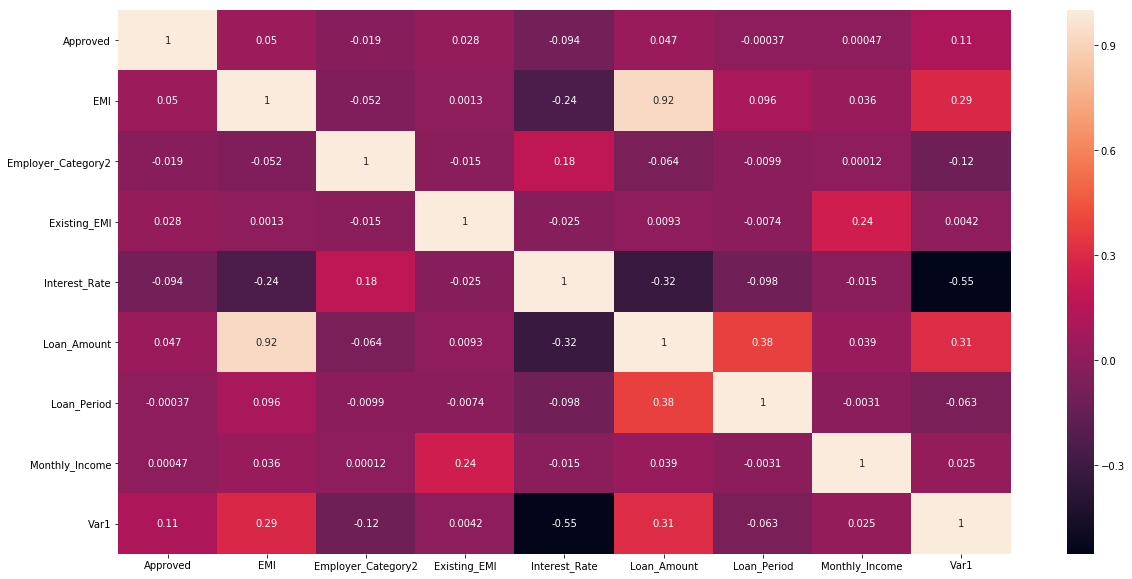

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(combined.corr(), annot=True)

In [71]:
np.sum(combined.isnull())/combined.shape[0]

Approved                               0.301123
City_Category                          0.011308
City_Code                              0.011308
Contacted                              0.000000
Customer_Existing_Primary_Bank_Code    0.134617
DOB                                    0.000180
EMI                                    0.679920
Employer_Category1                     0.056371
Employer_Category2                     0.060080
Employer_Code                          0.056371
Existing_EMI                           0.000832
Gender                                 0.000000
ID                                     0.000000
Interest_Rate                          0.679920
Lead_Creation_Date                     0.000000
Loan_Amount                            0.396792
Loan_Period                            0.396792
Monthly_Income                         0.000000
Primary_Bank_Type                      0.134617
Source                                 0.000000
Source_Category                        0

### Removing columns which have a lot of data missing

In [72]:
def add_binary_features(combined):
    
    combined['Missing_Loan_EMI'] = combined.EMI.isnull()
    combined['Missing_Loan_Amount'] = combined.Loan_Amount.isnull()
    
    return combined

combined = add_binary_features(combined)

In [73]:
del combined['EMI']
del combined['Interest_Rate']
del combined['Loan_Amount']
del combined['Loan_Period']


### Imputing missing values

In [79]:
def impute_missing_data(combined):
    # Obtain categorical, numerical and date feature names
    categorical_features = ['City_Category', 'City_Code', 'Contacted', 'Customer_Existing_Primary_Bank_Code',  
                            'Employer_Category1', 'Employer_Category2', 'Employer_Code', 'Gender', 'ID', 
                            'Primary_Bank_Type', 'Source', 'Source_Category', 'Var1']
    
    date_features = ['DOB', 'Lead_Creation_Date']
    
    numerical_features = [feat for feat in combined.columns.tolist() 
                          if feat not in categorical_features and feat not in date_features
                          and not feat.startswith('Missing') and feat != 'Approved']
    
    # Imputing most common values for date and categorical features
    for feat in categorical_features:
        combined[feat].fillna('-1', inplace=True)
    
    for feat in date_features:
        combined[feat].fillna(combined[feat].mode()[0], inplace=True)
        
    # Imputing median for numerical features
    for feat in numerical_features:
        combined[feat].fillna(combined[feat].mean(), inplace=True)
        
    return combined

combined = impute_missing_data(combined)

In [80]:
combined.isnull().sum()

Approved                               30037
City_Category                              0
City_Code                                  0
Contacted                                  0
Customer_Existing_Primary_Bank_Code        0
DOB                                        0
Employer_Category1                         0
Employer_Category2                         0
Employer_Code                              0
Existing_EMI                               0
Gender                                     0
ID                                         0
Lead_Creation_Date                         0
Monthly_Income                             0
Primary_Bank_Type                          0
Source                                     0
Source_Category                            0
Var1                                       0
Missing_Loan_EMI                           0
Missing_Loan_Amount                        0
dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(combined):
    categorical_features = ['City_Category', 'City_Code', 'Contacted', 'Customer_Existing_Primary_Bank_Code',  
                            'Employer_Category1', 'Employer_Category2', 'Employer_Code', 'Gender', 'ID', 
                            'Primary_Bank_Type', 'Source', 'Source_Category', 'Var1', 'Missing_Loan_EMI', 
                            'Missing_Loan_Amount']
    for feat in categorical_features:
        enc = LabelEncoder()
        combined[feat] = enc.fit_transform(combined[feat])
    
    return combined

combined = label_encoding(combined)

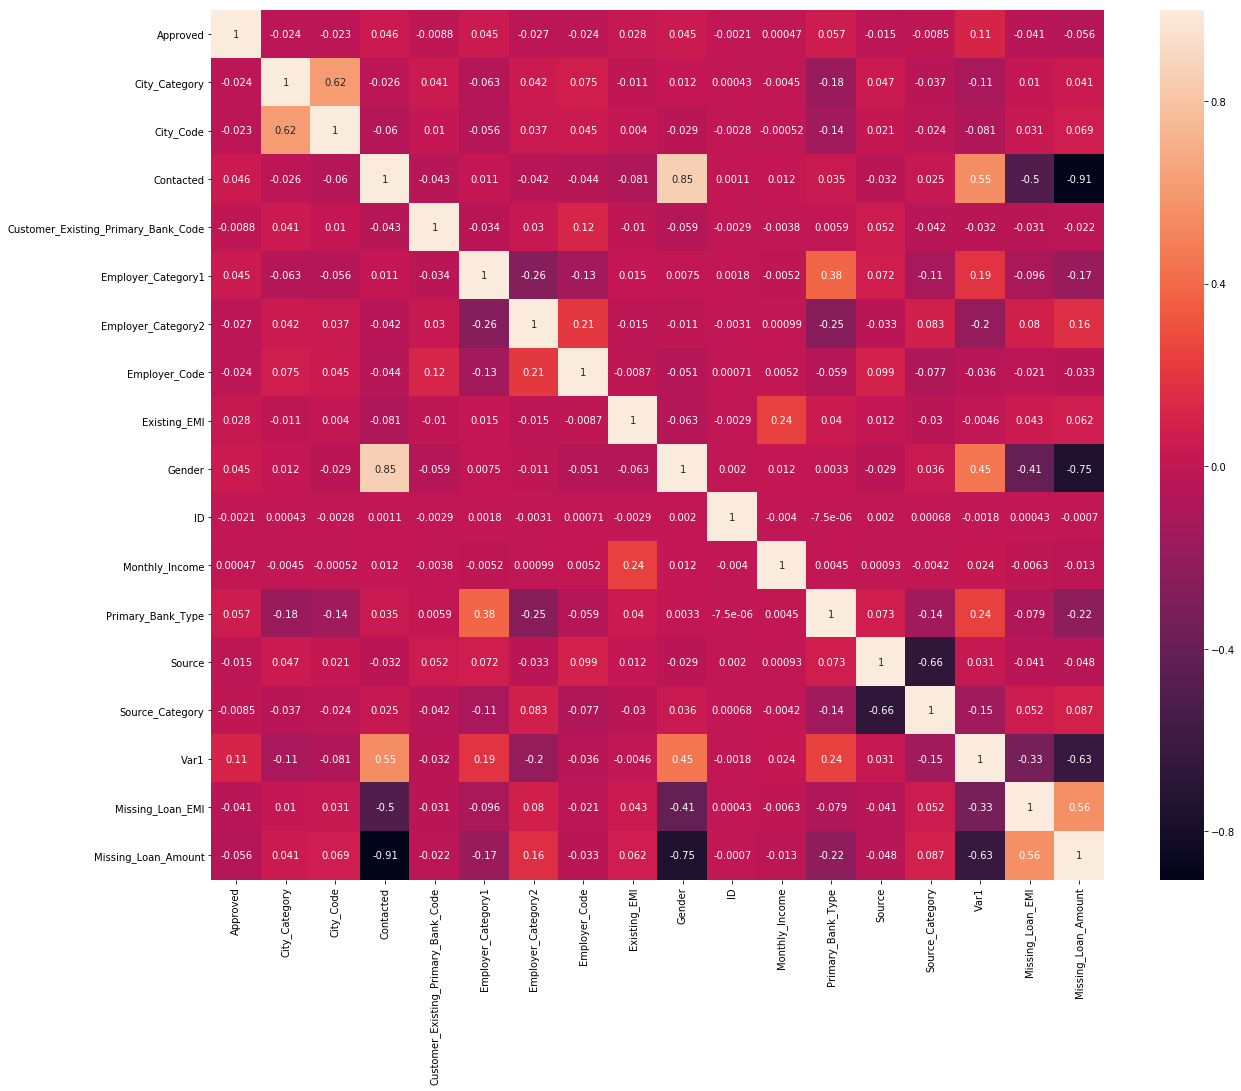

In [82]:
plt.figure(figsize=(20,16))
sns.heatmap(combined.corr(),annot=True)

### Using DOB to get age

In [83]:
def date_to_datetime(combined):
    combined['DOB'] = combined.DOB.apply(lambda date: date[:-2] + '19' + date[-2:])
    combined['DOB'] = pd.to_datetime(combined.DOB, format='%d/%m/%Y')

    combined['Lead_Creation_Date'] = pd.to_datetime(combined.Lead_Creation_Date, format='%d/%m/%y')
    
    return combined

combined = date_to_datetime(combined)

In [84]:
def get_age(combined):
    
    reference_date = pd.to_datetime(max(combined.Lead_Creation_Date))
    combined['Age'] = combined['Lead_Creation_Date'].subtract(combined['DOB']).apply(lambda timedelta: float(timedelta.days)/365)
    combined['Lead_Creation_Years'] = combined['Lead_Creation_Date'].apply(lambda date: float((reference_date - date).days)/365)
    
    del combined['DOB']
    del combined['Lead_Creation_Date']
    return combined

combined = get_age(combined)

### Looking for anomalies

In [85]:
train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [90]:
index_to_remove = combined[((combined.Monthly_Income>600000) | (combined.Existing_EMI>52500)) & (combined.Approved.notnull())].index.tolist()
index_to_keep = [index for index in combined.index.tolist() if index not in index_to_remove]

combined = combined.ix[index_to_keep, :]

/home/ashish/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [87]:
del combined['ID']

In [88]:
combined['Actual_Pay'] = combined['Monthly_Income'] - combined['Existing_EMI']

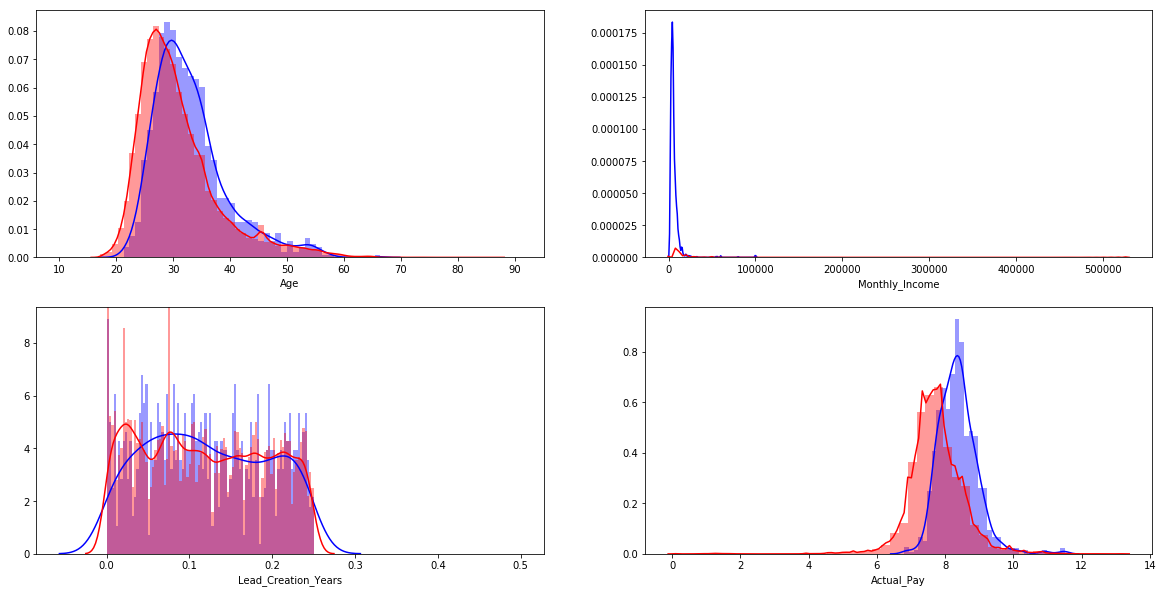

In [92]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.distplot(combined[combined.Approved==1].Age, color='blue',
             bins=np.linspace(10, 91, 80))
sns.distplot(combined[combined.Approved==0].Age, color='red',
             bins=np.linspace(10, 91, 80))

plt.subplot(222)
sns.distplot(combined[combined.Approved==1].Monthly_Income, color='blue',
             bins=np.linspace(0, 18, 180))
sns.distplot(combined[combined.Approved==0].Monthly_Income, color='red',
             bins=np.linspace(0, 18, 180))

plt.subplot(223)
sns.distplot(combined[combined.Approved==1].Lead_Creation_Years, color='blue',
             bins=np.linspace(0, 0.5, 183))
sns.distplot(combined[combined.Approved==0].Lead_Creation_Years, color='red',
             bins=np.linspace(0, 0.5, 183))

plt.subplot(224)
sns.distplot(np.log1p(combined[(combined.Approved==1) & (combined.Actual_Pay>0)].Actual_Pay), color='blue')
sns.distplot(np.log1p(combined[(combined.Approved==0) & (combined.Actual_Pay>0)].Actual_Pay), color='red')

In [93]:
combined['Monthly_Income'] = np.log1p(combined['Monthly_Income'])
combined['Existing_EMI'] = np.log1p(combined['Existing_EMI'])

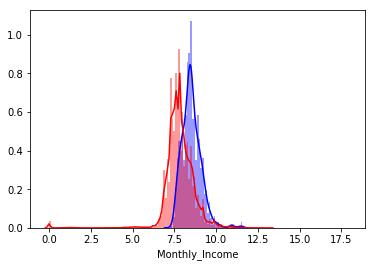

In [95]:

sns.distplot(combined[combined.Approved==1].Monthly_Income, color='blue',
             bins=np.linspace(0, 18, 180))
sns.distplot(combined[combined.Approved==0].Monthly_Income, color='red',
             bins=np.linspace(0, 18, 180))

In [105]:
target_label = 'Approved'
features = [feat for feat in combined.columns.tolist() if feat != target_label]

In [107]:
train_idx = combined[combined.Approved.notnull()].index.tolist()
test_idx = combined[combined.Approved.isnull()].index.tolist()

In [113]:
train = combined.loc[train_idx, features].values
test = combined.loc[test_idx, features].values
y = combined[target_label].loc[train_idx].values


In [114]:
print train
print test
print y

[[  1.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   3.70054795e+01
    2.10958904e-01   2.00000000e+03]
 [  1.00000000e+00   3.00000000e+00   1.00000000e+00 ...,   2.95945205e+01
    2.41095890e-01   3.50000000e+03]
 [  3.00000000e+00   1.25000000e+02   1.00000000e+00 ...,   3.36301370e+01
    2.00000000e-01   2.25000000e+03]
 ..., 
 [  2.00000000e+00   2.20000000e+01   1.00000000e+00 ...,   2.46794521e+01
    0.00000000e+00   1.60000000e+03]
 [  1.00000000e+00   2.00000000e+00   1.00000000e+00 ...,   3.82876712e+01
    0.00000000e+00   8.52700000e+03]
 [  1.00000000e+00   3.00000000e+00   1.00000000e+00 ...,   2.67671233e+01
    0.00000000e+00   4.23000000e+03]]
[[  3.00000000e+00   2.80000000e+01   1.00000000e+00 ...,   2.81068493e+01
    2.38356164e-01   2.15000000e+03]
 [  1.00000000e+00   3.00000000e+00   1.00000000e+00 ...,   3.49917808e+01
    2.49315068e-01   4.20000000e+03]
 [  2.00000000e+00   9.00000000e+00   0.00000000e+00 ...,   2.56328767e+01
    2.49315068e-01   

In [130]:
import xgboost as xgb
from sklearn.metrics import auc

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [119]:
X_train.shape,X_test.shape

((55748, 19), (13937, 19))

In [136]:
#LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
print 'accuracy:',accuracy_score(preds,y_test)
print 'roc auc:',roc_auc_score(preds,y_test)

 accuracy: 0.98572146086
roc auc: 0.492896096441


In [137]:
C_param_range = [0.001,0.01,0.1,1,10,100,1e-6]
for i  in C_param_range:
    lr=LogisticRegression(penalty='l2',C=i,n_jobs=4,random_state=42)
    lr.fit(X_train,y_train)
    preds=lr.predict(X_test)
    print 'accuracy:',accuracy_score(preds,y_test)
    print 'roc auc:',roc_auc_score(preds,y_test)

accuracy: 0.985649709407
roc auc: 0.492895586652
accuracy: 0.98572146086
roc auc: 0.492896096441
accuracy: 0.98572146086
roc auc: 0.492896096441
accuracy: 0.98572146086
roc auc: 0.492896096441
accuracy: 0.98572146086
roc auc: 0.492896096441
accuracy: 0.98572146086
roc auc: 0.492896096441
accuracy: 0.985649709407
roc auc: 0.492895586652


In [138]:
#ExtraTreesClassifier
clf=ExtraTreesClassifier()
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
print 'accuracy:',accuracy_score(preds,y_test)
print 'roc auc:',roc_auc_score(preds,y_test)

accuracy: 0.984860443424
roc auc: 0.492889974145


In [139]:
#RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
print 'accuracy:',accuracy_score(preds,y_test)
print 'roc auc:',roc_auc_score(preds,y_test)

accuracy: 0.985506206501
roc auc: 0.492894566856


In [140]:
#GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
print 'accuracy:',accuracy_score(preds,y_test)
print 'roc auc:',roc_auc_score(preds,y_test)

accuracy: 0.985219200689
roc auc: 0.492892526384


In [141]:
#DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
print 'accuracy:',accuracy_score(preds,y_test)
print 'roc auc:',roc_auc_score(preds,y_test)

accuracy: 0.9685728636
roc auc: 0.526020598148


In [149]:
import xgboost as xgb
nrounds=1000

In [157]:
random_state = 1212

params = {
    'objective': 'binary:logistic',
    'min_child_weight': 10.0,
    'max_depth': 7,
    'colsample_bytree': 0.5,
    'subsample': 0.9,
    'eta': 0.02,
    'max_delta_step': 1.2,
    'eval_metric': 'auc',
    'seed': random_state
}

In [158]:
d_subtrain = xgb.DMatrix(X_train, y_train) 
d_subtest = xgb.DMatrix(X_test, y_test) 
d_test = xgb.DMatrix(test)
watchlist = [(d_subtrain, 'subtrain'), (d_subtest, 'subtest')]

In [161]:
mdl = xgb.train(params, d_subtrain, nrounds, watchlist, early_stopping_rounds=150, maximize=True, verbose_eval=50)

[0]	subtrain-auc:0.5	subtest-auc:0.5
Multiple eval metrics have been passed: 'subtest-auc' will be used for early stopping.

Will train until subtest-auc hasn't improved in 150 rounds.
[50]	subtrain-auc:0.794748	subtest-auc:0.773176
[100]	subtrain-auc:0.879252	subtest-auc:0.848683
[150]	subtrain-auc:0.891744	subtest-auc:0.852569
[200]	subtrain-auc:0.900454	subtest-auc:0.854768
[250]	subtrain-auc:0.908269	subtest-auc:0.858397
[300]	subtrain-auc:0.913778	subtest-auc:0.859064
[350]	subtrain-auc:0.919624	subtest-auc:0.861
[400]	subtrain-auc:0.924932	subtest-auc:0.861796
[450]	subtrain-auc:0.930046	subtest-auc:0.861904
[500]	subtrain-auc:0.933807	subtest-auc:0.861402
[550]	subtrain-auc:0.937978	subtest-auc:0.861647
Stopping. Best iteration:
[436]	subtrain-auc:0.928592	subtest-auc:0.862279



In [162]:
p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)

In [169]:
submission['Approved'] += p_test

In [172]:
submission.to_csv('submission.csv', index=False)